#**Финальный проект**

Сайт - https://vestinn.ru/news/

##Блок 1. Работа с сайтом. Краулер

In [2]:
import requests
from pprint import pprint
!pip install fake_useragent
from fake_useragent import UserAgent
session = requests.session()
import time
from datetime import datetime
ua = UserAgent(verify_ssl=False)
headers = {'User-Agent': ua.random}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 1.3 MB/s eta 0:00:00


In [3]:
import sqlite3
from bs4 import BeautifulSoup
import re

In [4]:
conn = sqlite3.connect('news.db')
cur = conn.cursor()

In [5]:
cur.execute("""
CREATE TABLE IF NOT EXISTS texts 
(id INTEGER PRIMARY KEY AUTOINCREMENT, news_id int, pub_year int, pub_month int, 
pub_day int, title text, short_text text, full_text text, link text)
""")
#тэги
cur.execute("""
CREATE TABLE IF NOT EXISTS tags_names
(id int PRIMARY KEY, news_id int, tags text) 
""")
#просмотры
cur.execute("""
CREATE TABLE IF NOT EXISTS views 
(id int PRIMARY KEY, news_id int, views_news int) 
""")
conn.commit()
conn.close()

In [6]:
page_number = 1
url = f'https://vestinn.ru/news/?PAGEN_1={page_number}'
req = session.get(url, headers={'User-Agent': ua.random})
page = req.text

In [7]:
soup = BeautifulSoup(page, 'html.parser')

**Страница с новостями**

In [8]:
#все новости в общей страницы
news = soup.find_all('div', {'class': 'news'})

In [9]:
# заголовок - ссылка
title_obj = news[0].find('a')
title_obj

<a class="news__link" href="/news/vesti/215643/">
<div class="news__imgWrapper">
<img alt="Программа передач телеканала “Нижний Новгород 24” на 27 марта" class="news__img" src="/upload/iblock/c1e/a2gs5xb5o8juqqcnoxku2ovxqycmgy1s/Zakaty-NN24.webp"/>
</div>
<div class="news__textWrapper">
<div class="news__time">23:59</div>
<div class="news__date">26.03.23</div>
<div class="news__views">131</div>
<div class="news__text ellipsis">
<div class="ellipsis__text">Программа передач телеканала “Нижний Новгород 24” на 27 марта</div>
</div>
</div>
</a>

In [10]:
# просто заголовок
title = title_obj.find('div',{'class':"ellipsis__text"}).text
title

'Программа передач телеканала “Нижний Новгород 24” на 27 марта'

In [11]:
#Достанем свойства этой ссылки (куда ведет, class)
attrs = title_obj.attrs
attrs

{'class': ['news__link'], 'href': '/news/vesti/215643/'}

In [12]:
#ссылка
href = title_obj.attrs['href']
href

'/news/vesti/215643/'

In [13]:
#день публикации
pub_day = news[0].find('div', {'class':"news__date"}).text[:2]
pub_day

'26'

In [14]:
#месяц публикации
pub_day = news[0].find('div', {'class':"news__date"}).text[3:5]
pub_day

'03'

In [15]:
#год публикации
pub_day = news[0].find('div', {'class':"news__date"}).text[6:8]
pub_day

'23'

In [16]:
#кол-во просмотров новости 
views = news[0].find('div', {'class':"news__views"}).text
views

'131'

**Отдельная новость**

In [17]:
#Возьмем ссылку на полную новость и соединим с адерсом сайта
url_one = 'https://vestinn.ru' + href
url_one

'https://vestinn.ru/news/vesti/215643/'

In [18]:
#качаем, парсим
req = session.get(url_one, headers={'User-Agent': ua.random})
page = req.text

soup = BeautifulSoup(page, 'html.parser')

In [19]:
#короткий текст - превью 
short = soup.find('meta', {'property':'og:description'}).get('content')

cleantext = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
short_text = re.sub(cleantext, '', short)
short_text

'Смотрите сегодня на телеканале "Нижний Новгород 24".'

In [20]:
#полный текст статьи
full_text= soup.find('div', {'class':"readMore__content ellipsis__text"}).text
full_text[:200]

'\n\n\n\n\n\n00:00\n\n\n\n\r\n\t\t\t Из Горького с любовью. "Памятник архитектору". Документальный фильм\r\n\t\t\n\n\n\n16+\n\n\n\n\n\n\n00.25\n\n\n\n\r\n\t\t\t Убили председателя. Документальный фильм\r\n\t\t\n\n\n\n16+\n\n\n\n\n\n\n01.00\n\n\n\n\r\n\t\t\t Говори'

In [21]:
#хэштег
t = soup.find('div',{'class':"tags_list"})
tag = t.find('a').text
tag

'#Вести'

In [24]:
#полная дата
date = soup.find('meta',{'itemprop':"datePublished"}).get('datetime')
date

'26.03.23'

In [23]:
page_id = href.split('/')[-2]
page_id

'215643'

**Функции**

In [2]:
import requests
from pprint import pprint
!pip install fake_useragent
from fake_useragent import UserAgent
session = requests.session()
import time
from datetime import datetime
ua = UserAgent(verify_ssl=False)
headers = {'User-Agent': ua.random}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import sqlite3
from bs4 import BeautifulSoup
import re

In [27]:
conn = sqlite3.connect('news.db')
cur = conn.cursor()

In [28]:
cur.execute("""
CREATE TABLE IF NOT EXISTS texts 
(id INTEGER PRIMARY KEY AUTOINCREMENT, news_id int, pub_year int, pub_month int, 
pub_day int, title text, short_text text, full_text text, link text)
""")
#тэги
cur.execute("""
CREATE TABLE IF NOT EXISTS tags_names
(id int PRIMARY KEY, news_id int, tags text) 
""")
#просмотры
cur.execute("""
CREATE TABLE IF NOT EXISTS views 
(id int PRIMARY KEY, news_id int, views_news int) 
""")
conn.commit()
conn.close()

In [29]:
#страница со списком новостей 
def parse_news_page_block(one_block):
    block = {}
    a = one_block.find('a')
    block['title'] = str(a.text)
    block['href'] = a.attrs['href']
    block['views_news'] = int(one_block.find('div', {'class':"news__views"}).text)
    block['pub_day'] = int(one_block.find('div', {'class':"news__date"}).text[:2])
    block['pub_month'] = int(one_block.find('div', {'class':"news__date"}).text[3:5])
    block['pub_year'] = int(one_block.find('div', {'class':"news__date"}).text[6:8])
    return block

In [30]:
#страница одной новости 
def parse_one_article(block):
    url_one = 'https://vestinn.ru' + block['href']
    block['link'] = 'https://vestinn.ru' + block['href']
    block['page_id'] = int(block['href'].split('/')[-2])
    req = session.get(url_one, headers={'User-Agent': ua.random})
    page = req.text
    soup = BeautifulSoup(page, 'html.parser')
    block['full_text'] = str(soup.find('div', {'class':"readMore__content ellipsis__text"}).text)
    t = soup.find('div',{'class':"tags_list"})
    block['tags'] = str(t.find('a').text)
    short = soup.find('meta', {'property':'og:description'}).get('content')
    cleantext = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    block['short_text'] = str(re.sub(cleantext, '', short))
    block['date'] = str(soup.find('meta',{'itemprop':"datePublished"}).get('datetime'))
    return block

In [31]:
#Обработать N-ую страницу новостей
def get_nth_page(page_number):
    # скачиваем
    url = f'https://vestinn.ru/news/?PAGEN_1={page_number}'

    req = session.get(url, headers={'User-Agent': ua.random})
    page = req.text
    soup = BeautifulSoup(page, 'html.parser')
    
    # находим новости
    news = soup.find_all('div', {'class': 'news'})
    
    
    # идем по новостям и обрабатываем их
    blocks = []
    for n in news:
        try:
            blocks.append(parse_news_page_block(n))
        except Exception as e:
            print(e)

    # идем по отдельным статьям и достаем информацию
    result = []
    for b in blocks:
        if b['href'] not in seen_news:
                try:
                    res = parse_one_article(b)
                    res['news_id'] = b['page_id']
                    result.append(res)
                except Exception as e:
                    print(e)
        else:
            print('Seen', b['href'])
    
    # возвращаем найденную информацию
    return result

In [38]:
#Пишем в базу. РАБОТАЕТ, СОХРАНЯЕТ ТЭГИ
def write_to_db(block):
      # сохраняем информацию по текстам
    cur.execute(
        """
        INSERT INTO texts 
            (news_id, title, pub_year, pub_month, pub_day, short_text, full_text) 
            VALUES (?, ?, ?, ?, ?, ?, ?)
        """, (
            block['news_id'], block['title'], block['pub_year'], block['pub_month'], 
            block['pub_day'], block['short_text'], 
            block['full_text'])
    )
    conn.commit()
#тэги
    cur.execute(
        """
        INSERT INTO tags_names
            (news_id, tags)
            VALUES (?, ?)
        """, (
            block['news_id'], block['tags'])
    )    
    conn.commit()
#просмотры
    cur.execute(
        """
        INSERT INTO views  
            (news_id, views_news)
            VALUES (?,?)
        """, (
            block['news_id'], block['views_news'])
    )  
    conn.commit()   
    # добавляем, что такой id уже видели
    seen_news.add(block['news_id'])

In [39]:
conn = sqlite3.connect('news.db')
cur = conn.cursor()

In [40]:
cur.execute('SELECT news_id FROM texts')
seen_news = set(i[0] for i in cur.fetchall())

In [41]:
from tqdm.auto import tqdm

In [42]:
def run_all(n_pages):
    for i in tqdm(range(n_pages)):
        blocks = get_nth_page(i+1)
        for block in blocks:
            write_to_db(block)

In [43]:
run_all(30)

  0%|          | 0/3 [00:00<?, ?it/s]

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'


In [ ]:
#ПОЛНЫЙ КРАУЛЕР
import pandas as pd
conn = sqlite3.connect('news.db')
cur = conn.cursor()
cur.execute("""
CREATE TABLE IF NOT EXISTS texts 
(id INTEGER PRIMARY KEY AUTOINCREMENT, news_id int, pub_year int, pub_month int, 
pub_day int, title text, short_text text, full_text text, link text)
""")
#тэги
cur.execute("""
CREATE TABLE IF NOT EXISTS tags_names
(id int PRIMARY KEY, news_id int, tags text) 
""")
#просмотры
cur.execute("""
CREATE TABLE IF NOT EXISTS views 
(id int PRIMARY KEY, news_id int, views_news int) 
""")


conn.commit()
conn.close()

#страница со списком новостей 
def parse_news_page_block(one_block):
    block = {}
    a = one_block.find('a')
    block['title'] = str(a.text)
    block['href'] = a.attrs['href']
    block['views_news'] = int(one_block.find('div', {'class':"news__views"}).text)
    block['pub_day'] = int(one_block.find('div', {'class':"news__date"}).text[:2])
    block['pub_month'] = int(one_block.find('div', {'class':"news__date"}).text[3:5])
    block['pub_year'] = int(one_block.find('div', {'class':"news__date"}).text[6:8])
    return block
#страница одной новости 
def parse_one_article(block):
    url_one = 'https://vestinn.ru' + block['href']
    block['link'] = 'https://vestinn.ru' + block['href']
    block['page_id'] = int(block['href'].split('/')[-2])
    req = session.get(url_one, headers={'User-Agent': ua.random})
    page = req.text
    soup = BeautifulSoup(page, 'html.parser')
    block['full_text'] = str(soup.find('div', {'class':"readMore__content ellipsis__text"}).text)
    t = soup.find('div',{'class':"tags_list"})
    block['tags'] = str(t.find('a').text)
    short = soup.find('meta', {'property':'og:description'}).get('content')
    cleantext = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    block['short_text'] = str(re.sub(cleantext, '', short))
    block['date'] = str(soup.find('meta',{'itemprop':"datePublished"}).get('datetime'))
    return block

#Обработать N-ую страницу новостей
def get_nth_page(page_number):
    # скачиваем
    url = f'https://vestinn.ru/news/?PAGEN_1={page_number}'

    req = session.get(url, headers={'User-Agent': ua.random})
    page = req.text
    soup = BeautifulSoup(page, 'html.parser')
    
    # находим новости
    news = soup.find_all('div', {'class': 'news'})
    
    
    # идем по новостям и обрабатываем их
    blocks = []
    for n in news:
        try:
            blocks.append(parse_news_page_block(n))
        except Exception as e:
            print(e)

    # идем по отдельным статьям и достаем информацию
    result = []
    for b in blocks:
        if b['href'] not in seen_news:
                try:
                    res = parse_one_article(b)
                    res['news_id'] = b['page_id']
                    result.append(res)
                except Exception as e:
                    print(e)
        else:
            print('Seen', b['href'])
    
    # возвращаем найденную информацию
    return result  
#Пишем в базу. РАБОТАЕТ, СОХРАНЯЕТ ТЭГИ
def write_to_db(block):
      # сохраняем информацию по текстам
    cur.execute(
        """
        INSERT INTO texts 
            (news_id, title, pub_year, pub_month, pub_day, short_text, full_text, link) 
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        """, (
            block['news_id'], block['title'], block['pub_year'], block['pub_month'], 
            block['pub_day'], block['short_text'], 
            block['full_text'], block['link'])
    )
    conn.commit()
#тэги
    cur.execute(
        """
        INSERT INTO tags_names
            (news_id, tags)
            VALUES (?, ?)
        """, (
            block['news_id'], block['tags'])
    )    
    conn.commit()
#просмотры
    cur.execute(
        """
        INSERT INTO views  
            (news_id, views_news)
            VALUES (?,?)
        """, (
            block['news_id'], block['views_news'])
    )  
    conn.commit()  
    # добавляем, что такой id уже видели
    seen_news.add(block['news_id'])  

from tqdm.auto import tqdm
conn = sqlite3.connect('news.db')
cur = conn.cursor()

cur.execute('SELECT news_id FROM texts')
seen_news = set(i[0] for i in cur.fetchall())

def run_all(n_pages):
    for i in tqdm(range(n_pages)):
        blocks = get_nth_page(i+1)
        for block in blocks:
            write_to_db(block)

run_all(30)

con = sqlite3.connect('news.db')  # подключение
cur = con.cursor() 

id_title_text = """
SELECT news_id, title, full_text, pub_day from texts
"""
cur.execute(id_title_text)

df = pd.read_sql_query(id_title_text, con=conn)

##Работа с базой 

In [46]:
con = sqlite3.connect('news.db')  # подключение
cur = con.cursor() 

In [47]:
id_title_text = """
SELECT news_id, title, full_text, short_text, pub_day, link from texts
"""
cur.execute(id_title_text)

In [53]:
import pandas as pd
df = pd.read_sql_query(id_title_text, con=conn)
df

,news_id,title,full_text,short_text,pub_day,link
0,215643,\n\n\n\n\n23:59\n26.03.23\n141\n\nПрограмма пе...,\n\n\n\n\n\n00:00\n\n\n\n\r\n\t\t\t Из Горьког...,"Смотрите сегодня на телеканале ""Нижний Новгоро...",26,None
1,215643,\n\n\n\n\n23:59\n26.03.23\n142\n\nПрограмма пе...,\n\n\n\n\n\n00:00\n\n\n\n\r\n\t\t\t Из Горьког...,"Смотрите сегодня на телеканале ""Нижний Новгоро...",26,None
2,215702,\n\n\n\n\n18:00\n26.03.23\n280\n\nРоспотребнад...,\n\r\n\t Управление Роспотребнадзора усилило с...,Усилен контроль за качеством воды из крана,26,None
3,215701,\n\n\n\n\n17:00\n26.03.23\n281\n\nДва трамвая ...,"\n\r\n\t Два трамвая ""МиНиН"" сегодня вышел по ...",Пополнения трамвайного парка в ближайшее время...,26,None
4,215700,\n\n\n\n\n16:30\n26.03.23\n331\n\nМЧС сообщает...,\n\n Весенний паводок начал...,Затопление произошло на 4-х участках в регионе...,26,None
...,...,...,...,...,...,...
164,215624,\n\n\n\n\n13:26\n24.03.23\n470\n\n7 партию гум...,\n\n Заключительная в этом ...,62 тонны гуманитарной помощи собрали и отправи...,24,https://vestinn.ru/news/vesti/215624/
165,215635,\n\n\n\n\n12:35\n24.03.23\n688\n\nСамая дорога...,\n\n Первое место в рейтинг...,Квартира расположена недалеко от Нижегородског...,24,https://vestinn.ru/news/society/215635/
166,215375,\n\n\n\n\n12:28\n24.03.23\n63156\n\nНародные п...,\n\n Феофан жил на рубеже V...,Верующие 25 марта вспоминают Феофана Исповедни...,24,https://vestinn.ru/news/vesti/215375/
167,215638,\n\n\n\n\n12:00\n24.03.23\n593\n\nКовид обнару...,\n\n В Нижегородской област...,Летальных случаев за сутки не было с 20 марта.,24,https://vestinn.ru/news/health/215638/


In [54]:
#случайная новость
df['full_text'].sample(random_state=1)

48    \n\n                    Товарный поезд сошел с...
Name: full_text, dtype: object

In [55]:
list_of_texts = df[['title','full_text']].values.tolist()

In [49]:
#САМЫЕ ПОПУЛЯРНЫЕ НОВОСТИ. ИТОГ
current_month = time.strftime("%m")
popular_news = """
SELECT texts.news_id, title, views_news, pub_month, link
    FROM texts
        JOIN views ON texts.news_id = views.news_id
        WHERE pub_month = ?
        GROUP BY title
        ORDER BY views_news DESC
        LIMIT 3;
"""
cur.execute(popular_news, (current_month,))
df = pd.read_sql_query(popular_news, params=[current_month], con=con)

print("Топ-3 самых популярных новостей за текущий месяц:")
for i, row in df.iterrows(): #перебираю строки в df 
    popular ="{}. {} ({})".format(i+1, row['title'], row['link'])
    print(popular)

Топ-3 самых популярных новостей за текущий месяц:
1. 




12:28
24.03.23
63156

Народные приметы: 25 марта. Не делайте это в Феофанов день, если вам дорога семья


 (https://vestinn.ru/news/vesti/215375/)
2. 




12:28
24.03.23
63155

Народные приметы: 25 марта. Не делайте это в Феофанов день, если вам дорога семья


 (https://vestinn.ru/news/vesti/215375/)
3. 




12:28
24.03.23
63152

Народные приметы: 25 марта. Не делайте это в Феофанов день, если вам дорога семья


 (None)


In [50]:
#Самый насыщенный новостями день
current_month = time.strftime("%m") 
fullest_day ="""
SELECT count(pub_day) as cnt, pub_day, pub_month
    FROM texts
        WHERE pub_month = ?
        GROUP BY pub_day
        ORDER BY cnt DESC
        LIMIT 30;
"""
cur.execute(fullest_day, (current_month, ))
cur.fetchall()

df = pd.read_sql_query(fullest_day, params = [current_month], con=con)
df

,cnt,pub_day,pub_month
0,73,24,3
1,45,25,3
2,34,26,3
3,17,23,3


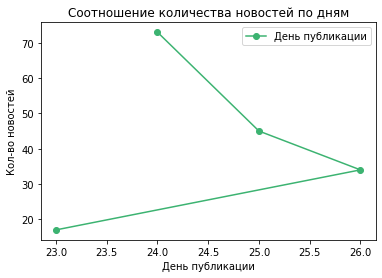

In [51]:
#Самый насыщенный новостями день + график
from matplotlib import pyplot as plt
current_month = time.strftime("%m") 
fullest_day ="""
SELECT count(pub_day) as cnt, pub_day, pub_month
    FROM texts
        WHERE pub_month = ?
        GROUP BY pub_day
        ORDER BY cnt DESC
        LIMIT 30;
"""
cur.execute(fullest_day, (current_month, ))
cur.fetchall()

df = pd.read_sql_query(fullest_day, params = [current_month], con=con)
df.plot(x = "pub_day", y = "cnt", color='mediumseagreen', marker='o', label='День публикации')
plt.locator_params (axis='x') 
plt.locator_params (axis='y')      
plt.title('Соотношение количества новостей по дням')   
plt.xlabel('День публикации')   
plt.ylabel('Кол-во новостей')   
# plt.show()   
fullest_day_img = plt.savefig('fullest_day.png', facecolor = 'lightgrey') #сохраняем как картинку
plt.show()
img_to_user = open('fullest_day.png', 'rb')
# bot.send_photo(message.chat.id, img_to_user)

##Аналитика

In [56]:
import gensim
import logging
import urllib.request
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import wordpunct_tokenize
!pip install pymorphy2
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
import nltk
nltk.download('stopwords')
stops = stopwords.words("russian")

tfidf = TfidfVectorizer(
    analyzer="word",
    stop_words=stops, ngram_range=(1,3),min_df=3 
)

In [58]:
articles_preprocessed = []
for a_text in list_of_texts:
    a_tokens = wordpunct_tokenize(a_text[1])
    a_lemmatized = " ".join([morph.parse(item)[0].normal_form for item in a_tokens])
    articles_preprocessed.append(a_lemmatized)
articles_tfidf = tfidf.fit_transform(articles_preprocessed)
print(f"Матрица на {articles_tfidf.shape[0]} документов и {articles_tfidf.shape[1]} термов")

Матрица на 169 документов и 11383 термов


In [59]:
# ключевые слова для 3х новостей
import numpy as np
def get_top_tf_idf_words(tfidf_vector, feature_names, top_n):
    sorted_nzs = np.argsort(tfidf_vector.data)[:-(top_n+1):-1]
    return feature_names[tfidf_vector.indices[sorted_nzs]]
feature_names = np.array(tfidf.get_feature_names_out())

for i, article in enumerate(list_of_texts[:3]):
    if i <= 1830:
        article_vector = articles_tfidf[i, :]
        words = get_top_tf_idf_words(article_vector, feature_names, 10)
        print(article[0])
        print(words)  






23:59
26.03.23
141

Программа передач телеканала “Нижний Новгород 24” на 27 марта



['16' 'вести' '00' '50' 'цикл' '10' 'показывать радио'
 'документальный фильм' 'говорить показывать радио' 'радио']





23:59
26.03.23
142

Программа передач телеканала “Нижний Новгород 24” на 27 марта



['16' 'вести' '00' '50' 'цикл' '10' 'показывать радио'
 'документальный фильм' 'говорить показывать радио' 'радио']





18:00
26.03.23
280

Роспотребнадзор усилил мониторинг территорий, на которых возможен паводок



['контроль' 'усильный' 'усильный контроль' 'находиться'
 'подтопление фото unsplash' 'нефтебаза который' 'находиться зона'
 'зона подтопление' 'подтопление фото' 'недопущение распространение']


**Близость между векторами текстов, три похожих**

In [70]:
from sklearn.metrics.pairwise import cosine_similarity
listofsimil=[]
listofsimil1=[]
listofsimil2=[]
print('Тексты, для которых находят похожие тексты:',list_of_texts[0][0])
for d in cosine_similarity(articles_tfidf[0], articles_tfidf).flatten().argsort()[:-4:-1]:
    listofsimil.append(list_of_texts[d][0])
print('Тексты:')
for i in listofsimil:
    print('\n'+(str(i)))

Тексты, для которых находят похожие тексты: 




23:59
26.03.23
141

Программа передач телеканала “Нижний Новгород 24” на 27 марта



Тексты:






23:59
26.03.23
141

Программа передач телеканала “Нижний Новгород 24” на 27 марта









23:59
26.03.23
142

Программа передач телеканала “Нижний Новгород 24” на 27 марта









23:59
26.03.23
143

Программа передач телеканала “Нижний Новгород 24” на 27 марта





##Таймер

In [6]:
import schedule
import datetime
import pytz
import time
import requests
import pandas as pd
import requests
from pprint import pprint
# !pip install fake_useragent
from fake_useragent import UserAgent
session = requests.session()
import time
from datetime import datetime
ua = UserAgent(verify_ssl=False)
headers = {'User-Agent': ua.random}

import sqlite3
from bs4 import BeautifulSoup
import re
def crawler():
    conn = sqlite3.connect('news.db')
    cur = conn.cursor()
    cur.execute("""
    CREATE TABLE IF NOT EXISTS texts 
    (id INTEGER PRIMARY KEY AUTOINCREMENT, news_id int, pub_year int, pub_month int, 
    pub_day int, title text, short_text text, full_text text, link text)
    """)
    #тэги
    cur.execute("""
    CREATE TABLE IF NOT EXISTS tags_names
    (id int PRIMARY KEY, news_id int, tags text) 
    """)
    #просмотры
    cur.execute("""
    CREATE TABLE IF NOT EXISTS views 
    (id int PRIMARY KEY, news_id int, views_news int) 
    """)


    conn.commit()
    conn.close()
    #страница со списком новостей 
    def parse_news_page_block(one_block):
        block = {}
        a = one_block.find('a')
        block['title'] = str(a.text)
        block['href'] = a.attrs['href']
        block['views_news'] = int(one_block.find('div', {'class':"news__views"}).text)
        block['pub_day'] = int(one_block.find('div', {'class':"news__date"}).text[:2])
        block['pub_month'] = int(one_block.find('div', {'class':"news__date"}).text[3:5])
        block['pub_year'] = int(one_block.find('div', {'class':"news__date"}).text[6:8])
        return block
    #страница одной новости 
    def parse_one_article(block):
        url_one = 'https://vestinn.ru' + block['href']
        block['link'] = 'https://vestinn.ru' + block['href']
        block['page_id'] = int(block['href'].split('/')[-2])
        req = session.get(url_one, headers={'User-Agent': ua.random})
        page = req.text
        soup = BeautifulSoup(page, 'html.parser')
        block['full_text'] = str(soup.find('div', {'class':"readMore__content ellipsis__text"}).text)
        t = soup.find('div',{'class':"tags_list"})
        block['tags'] = str(t.find('a').text)
        short = soup.find('meta', {'property':'og:description'}).get('content')
        cleantext = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
        block['short_text'] = str(re.sub(cleantext, '', short))
        block['date'] = str(soup.find('meta',{'itemprop':"datePublished"}).get('datetime'))
        return block

    #Обработать N-ую страницу новостей
    def get_nth_page(page_number):
        # скачиваем
        url = f'https://vestinn.ru/news/?PAGEN_1={page_number}'

        req = session.get(url, headers={'User-Agent': ua.random})
        page = req.text
        soup = BeautifulSoup(page, 'html.parser')
        
        # находим новости
        news = soup.find_all('div', {'class': 'news'})
        
        
        # идем по новостям и обрабатываем их
        blocks = []
        for n in news:
            try:
                blocks.append(parse_news_page_block(n))
            except Exception as e:
                print(e)

        # идем по отдельным статьям и достаем информацию
        result = []
        for b in blocks:
            if b['href'] not in seen_news:
                    try:
                        res = parse_one_article(b)
                        res['news_id'] = b['page_id']
                        result.append(res)
                    except Exception as e:
                        print(e)
            else:
                print('Seen', b['href'])
        
        # возвращаем найденную информацию
        return result  
    #Пишем в базу. 
    def write_to_db(block):
          # сохраняем информацию по текстам
        cur.execute(
            """
            INSERT INTO texts 
                (news_id, title, pub_year, pub_month, pub_day, short_text, full_text, link) 
                VALUES (?, ?, ?, ?, ?, ?, ?, ?)
            """, (
                block['news_id'], block['title'], block['pub_year'], block['pub_month'], 
                block['pub_day'], block['short_text'], 
                block['full_text'], block['link'])
        )
        conn.commit()
    #тэги
        cur.execute(
            """
            INSERT INTO tags_names
                (news_id, tags)
                VALUES (?, ?)
            """, (
                block['news_id'], block['tags'])
        )    
        conn.commit()
    #просмотры
        cur.execute(
            """
            INSERT INTO views  
                (news_id, views_news)
                VALUES (?,?)
            """, (
                block['news_id'], block['views_news'])
        )  
        conn.commit()  
        # добавляем, что такой id уже видели
        seen_news.add(block['news_id'])  
 

    from tqdm.auto import tqdm
    conn = sqlite3.connect('news.db')
    cur = conn.cursor()

    cur.execute('SELECT news_id FROM texts')
    seen_news = set(i[0] for i in cur.fetchall())

    def run_all(n_pages):
        for i in tqdm(range(n_pages)):
            blocks = get_nth_page(i+1)
            for block in blocks:
                write_to_db(block)

    run_all(30)

def main(): #выставляем время, в которое будетт запускаться краулер 
        schedule.every().day.at("04:01").do(crawler)
        while True:
            schedule.run_pending()
            time.sleep(1)
if __name__ == '__main__': #условие, где вызываем функцию
    main()

  0%|          | 0/30 [00:00<?, ?it/s]

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'


KeyboardInterrupt: ignored

In [ ]:
import schedule
import datetime
import pytz
import time
import requests
import pandas as pd
import requests
from pprint import pprint
# !pip install fake_useragent
from fake_useragent import UserAgent
session = requests.session()
import time
from datetime import datetime
ua = UserAgent(verify_ssl=False)
headers = {'User-Agent': ua.random}

import sqlite3
from bs4 import BeautifulSoup
import re
def crawler():
    conn = sqlite3.connect('news.db')
    cur = conn.cursor()

    #страница со списком новостей 
    def parse_news_page_block(one_block):
        block = {}
        a = one_block.find('a')
        block['title'] = str(a.text)
        block['href'] = a.attrs['href']
        block['views_news'] = int(one_block.find('div', {'class':"news__views"}).text)
        block['pub_day'] = int(one_block.find('div', {'class':"news__date"}).text[:2])
        block['pub_month'] = int(one_block.find('div', {'class':"news__date"}).text[3:5])
        block['pub_year'] = int(one_block.find('div', {'class':"news__date"}).text[6:8])
        return block
    #страница одной новости 
    def parse_one_article(block):
        url_one = 'https://vestinn.ru' + block['href']
        block['page_id'] = int(block['href'].split('/')[-2])
        req = session.get(url_one, headers={'User-Agent': ua.random})
        page = req.text
        soup = BeautifulSoup(page, 'html.parser')
        block['full_text'] = str(soup.find('div', {'class':"readMore__content ellipsis__text"}).text)
        t = soup.find('div',{'class':"tags_list"})
        block['tags'] = str(t.find('a').text)
        short = soup.find('meta', {'property':'og:description'}).get('content')
        cleantext = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
        block['short_text'] = str(re.sub(cleantext, '', short))
        block['date'] = str(soup.find('meta',{'itemprop':"datePublished"}).get('datetime'))
        return block

    #Обработать N-ую страницу новостей
    def get_nth_page(page_number):
        # скачиваем
        url = f'https://vestinn.ru/news/?PAGEN_1={page_number}'

        req = session.get(url, headers={'User-Agent': ua.random})
        page = req.text
        soup = BeautifulSoup(page, 'html.parser')
        
        # находим новости
        news = soup.find_all('div', {'class': 'news'})
        
        
        # идем по новостям и обрабатываем их
        blocks = []
        for n in news:
            try:
                blocks.append(parse_news_page_block(n))
            except Exception as e:
                print(e)

        # идем по отдельным статьям и достаем информацию
        result = []
        for b in blocks:
            if b['href'] not in seen_news:
                    try:
                        res = parse_one_article(b)
                        res['news_id'] = b['page_id']
                        result.append(res)
                    except Exception as e:
                        print(e)
            else:
                print('Seen', b['href'])
        
        # возвращаем найденную информацию
        return result  
    #Пишем в базу. РАБОТАЕТ, СОХРАНЯЕТ ТЭГИ
    def write_to_db(block):
          # сохраняем информацию по текстам
        cur.execute(
            """
            INSERT INTO texts 
                (news_id, title, pub_year, pub_month, pub_day, short_text, full_text) 
                VALUES (?, ?, ?, ?, ?, ?, ?)
            """, (
                block['news_id'], block['title'], block['pub_year'], block['pub_month'], 
                block['pub_day'], block['short_text'], 
                block['full_text'])
        )
        conn.commit()
    #тэги
        cur.execute(
            """
            INSERT INTO tags_names
                (news_id, tags)
                VALUES (?, ?)
            """, (
                block['news_id'], block['tags'])
        )    
        conn.commit()
    #просмотры
        cur.execute(
            """
            INSERT INTO views  
                (news_id, views_news)
                VALUES (?,?)
            """, (
                block['news_id'], block['views_news'])
        )  
        conn.commit()  
        # добавляем, что такой id уже видели
        seen_news.add(block['news_id'])  

    from tqdm.auto import tqdm
    conn = sqlite3.connect('news.db')
    cur = conn.cursor()

    cur.execute('SELECT news_id FROM texts')
    seen_news = set(i[0] for i in cur.fetchall())

    def run_all(n_pages):
        for i in tqdm(range(n_pages)):
            blocks = get_nth_page(i+1)
            for block in blocks:
                write_to_db(block)

    run_all(30)
def main(): #выставляем время, в которое будетт запускаться краулер 
        schedule.every().day.at("12:00").do(crawler)
        while True:
            schedule.run_pending()
            time.sleep(1)
if __name__ == '__main__': #условие, где вызываем функцию
    main()

##БОТ

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Последние новости: 
Программа передач телеканала “Нижний Новгород 24” на 27 марта. Подробнее по ссылке: https://vestinn.ru/news/vesti/215643/
Роспотребнадзор усилил мониторинг территорий, на которых возможен паводок. Подробнее по ссылке: https://vestinn.ru/news/society/215702/
Два трамвая "МиНиН" вышли по маршруту двойки. Подробнее по ссылке: https://vestinn.ru/news/society/215701/


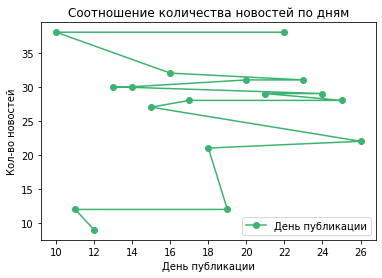

Матрица на 542 документов и 5459 термов





23:59
26.03.23
155

Программа передач телеканала “Нижний Новгород 24” на 27 марта



['16' 'вести' '00' 'цикл' '50']


In [8]:
!pip install telebot
import telebot
from telebot import types
import threading
import sqlite3
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import requests
from pprint import pprint
import time
from datetime import datetime

notes = {}

bot = telebot.TeleBot('5627814001:AAFfUSr_HramrdpQ8HCBirmYSjJ0dvaNi_g')

!pip install fake_useragent
from fake_useragent import UserAgent
session = requests.session()
ua = UserAgent(verify_ssl=False)
headers = {'User-Agent': ua.random}
import gensim
import logging
import urllib.request
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import wordpunct_tokenize
!pip install pymorphy2
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
import nltk
nltk.download('stopwords')
stops = stopwords.words("russian")
tfidf = TfidfVectorizer(
    analyzer="word",
    stop_words=stops, ngram_range=(1,3),min_df=3 
)


#БЛОК ПОСЛЕДНИЕ НОВОСТИ. открываем сайт
print('Последние новости: ')
page_number = 1
url = f'https://vestinn.ru/news/?PAGEN_1={page_number}'
req = session.get(url, headers={'User-Agent': ua.random})
page = req.text

soup = BeautifulSoup(page, 'html.parser')

#все новости с общей страницы
news = soup.find_all('div', {'class': 'news'})
#title для последних трех новостей + ссылка

title_obj = news[0].find('a')
title = title_obj.find('div',{'class':"ellipsis__text"}).text
attrs = title_obj.attrs
href = title_obj.attrs['href']
url= 'https://vestinn.ru' + href
print(f'{title}. Подробнее по ссылке: {url}')

title_obj1 = news[1].find('a')
title1 = title_obj1.find('div',{'class':"ellipsis__text"}).text
attrs1 = title_obj1.attrs
href1 = title_obj1.attrs['href']
url1= 'https://vestinn.ru' + href1
print(f'{title1}. Подробнее по ссылке: {url1}')

title_obj2 = news[2].find('a')
title2 = title_obj2.find('div',{'class':"ellipsis__text"}).text
attrs2 = title_obj2.attrs
href2 = title_obj2.attrs['href']
url2 = 'https://vestinn.ru' + href2
print(f'{title2}. Подробнее по ссылке: {url2}')


#ПОЛНАЯ ПРОГА ДЛЯ КРАУЛЕРА. 
import schedule
import datetime
import pytz
import time
import requests
import pandas as pd
import requests
from pprint import pprint
# !pip install fake_useragent
from fake_useragent import UserAgent
session = requests.session()
import time
from datetime import datetime
ua = UserAgent(verify_ssl=False)
headers = {'User-Agent': ua.random}

import sqlite3
from bs4 import BeautifulSoup
import re
def crawler():
    conn = sqlite3.connect('news.db')
    cur = conn.cursor()
    cur.execute("""
    CREATE TABLE IF NOT EXISTS texts 
    (id INTEGER PRIMARY KEY AUTOINCREMENT, news_id int, pub_year int, pub_month int, 
    pub_day int, title text, short_text text, full_text text, link text)
    """)
    #тэги
    cur.execute("""
    CREATE TABLE IF NOT EXISTS tags_names
    (id int PRIMARY KEY, news_id int, tags text) 
    """)
    #просмотры
    cur.execute("""
    CREATE TABLE IF NOT EXISTS views 
    (id int PRIMARY KEY, news_id int, views_news int) 
    """)


    conn.commit()
    conn.close()
    #страница со списком новостей 
    def parse_news_page_block(one_block):
        block = {}
        a = one_block.find('a')
        block['title'] = str(a.text)
        block['href'] = a.attrs['href']
        block['views_news'] = int(one_block.find('div', {'class':"news__views"}).text)
        block['pub_day'] = int(one_block.find('div', {'class':"news__date"}).text[:2])
        block['pub_month'] = int(one_block.find('div', {'class':"news__date"}).text[3:5])
        block['pub_year'] = int(one_block.find('div', {'class':"news__date"}).text[6:8])
        return block
    #страница одной новости 
    def parse_one_article(block):
        url_one = 'https://vestinn.ru' + block['href']
        block['link'] = 'https://vestinn.ru' + block['href']
        block['page_id'] = int(block['href'].split('/')[-2])
        req = session.get(url_one, headers={'User-Agent': ua.random})
        page = req.text
        soup = BeautifulSoup(page, 'html.parser')
        block['full_text'] = str(soup.find('div', {'class':"readMore__content ellipsis__text"}).text)
        t = soup.find('div',{'class':"tags_list"})
        block['tags'] = str(t.find('a').text)
        short = soup.find('meta', {'property':'og:description'}).get('content')
        cleantext = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
        block['short_text'] = str(re.sub(cleantext, '', short))
        block['date'] = str(soup.find('meta',{'itemprop':"datePublished"}).get('datetime'))
        return block

    #Обработать N-ую страницу новостей
    def get_nth_page(page_number):
        # скачиваем
        url = f'https://vestinn.ru/news/?PAGEN_1={page_number}'

        req = session.get(url, headers={'User-Agent': ua.random})
        page = req.text
        soup = BeautifulSoup(page, 'html.parser')
        
        # находим новости
        news = soup.find_all('div', {'class': 'news'})
        
        
        # идем по новостям и обрабатываем их
        blocks = []
        for n in news:
            try:
                blocks.append(parse_news_page_block(n))
            except Exception as e:
                print(e)

        # идем по отдельным статьям и достаем информацию
        result = []
        for b in blocks:
            if b['href'] not in seen_news:
                    try:
                        res = parse_one_article(b)
                        res['news_id'] = b['page_id']
                        result.append(res)
                    except Exception as e:
                        print(e)
            else:
                print('Seen', b['href'])
        
        # возвращаем найденную информацию
        return result  
    #Пишем в базу. 
    def write_to_db(block):
          # сохраняем информацию по текстам
        cur.execute(
            """
            INSERT INTO texts 
                (news_id, title, pub_year, pub_month, pub_day, short_text, full_text, link) 
                VALUES (?, ?, ?, ?, ?, ?, ?, ?)
            """, (
                block['news_id'], block['title'], block['pub_year'], block['pub_month'], 
                block['pub_day'], block['short_text'], 
                block['full_text'], block['link'])
        )
        conn.commit()
    #тэги
        cur.execute(
            """
            INSERT INTO tags_names
                (news_id, tags)
                VALUES (?, ?)
            """, (
                block['news_id'], block['tags'])
        )    
        conn.commit()
    #просмотры
        cur.execute(
            """
            INSERT INTO views  
                (news_id, views_news)
                VALUES (?,?)
            """, (
                block['news_id'], block['views_news'])
        )  
        conn.commit()  
        # добавляем, что такой id уже видели
        seen_news.add(block['news_id'])  
 

    from tqdm.auto import tqdm
    conn = sqlite3.connect('news.db')
    cur = conn.cursor()

    cur.execute('SELECT news_id FROM texts')
    seen_news = set(i[0] for i in cur.fetchall())

    def run_all(n_pages):
        for i in tqdm(range(n_pages)):
            blocks = get_nth_page(i+1)
            for block in blocks:
                write_to_db(block)

    run_all(30)

def main(): #Таймер
    # Выставляем время, в которое будет запускаться краулер 
    schedule.every().day.at("02:28").do(crawler)
    while True:
        schedule.run_pending()
        time.sleep(1)

if __name__ == 'main':
    # Запускаем функцию main() в отдельном потоке
    t = threading.Thread(target=main)
    t.start()
    t.join() # Ожидаем завершения потока
    # Код после выполнения функции main() продолжит выполняться

con = sqlite3.connect('news.db')  # подключение
cur = con.cursor() 

id_title_text = """
SELECT news_id, title, full_text, pub_day, link  from texts
"""
cur.execute(id_title_text)

df = pd.read_sql_query(id_title_text, con=conn)


#БЛОК СТАТИСТИКИ

# #ГРАФИК САМЫЕ НАСЫЩЕННЫЕ ДНИ
current_month = time.strftime("%m") 
fullest_day ="""
SELECT count(pub_day) as cnt, pub_day, pub_month
    FROM texts
        WHERE pub_month = ?
        GROUP BY pub_day
        ORDER BY cnt DESC
        LIMIT 30;
"""
cur.execute(fullest_day, (current_month, ))
cur.fetchall()

df = pd.read_sql_query(fullest_day, params = [current_month], con=con)
df.plot(x = "pub_day", y = "cnt", color='mediumseagreen', marker='o', label='День публикации')
plt.locator_params (axis='x') 
plt.locator_params (axis='y')      
plt.title('Соотношение количества новостей по дням')   
plt.xlabel('День публикации')   
plt.ylabel('Кол-во новостей')     
fullest_day_img = plt.savefig('fullest_day.png', facecolor = 'lightgrey') #сохраняем как картинку
plt.show()




#КЛЮЧЕВЫЕ СЛОВА
con = sqlite3.connect('news.db')  # подключение
cur = con.cursor() 
id_title_text = """
SELECT news_id, title, full_text, pub_day from texts
"""
cur.execute(id_title_text)
df = pd.read_sql_query(id_title_text, con=conn)
list_of_texts = df[['title','full_text']].values.tolist()
articles_preprocessed = []
for a_text in list_of_texts:
    a_tokens = wordpunct_tokenize(a_text[1])
    a_lemmatized = " ".join([morph.parse(item)[0].normal_form for item in a_tokens])
    articles_preprocessed.append(a_lemmatized)
articles_tfidf = tfidf.fit_transform(articles_preprocessed)
print(f"Матрица на {articles_tfidf.shape[0]} документов и {articles_tfidf.shape[1]} термов")

def get_top_tf_idf_words(tfidf_vector, feature_names, top_n):
    sorted_nzs = np.argsort(tfidf_vector.data)[:-(top_n+1):-1]
    return feature_names[tfidf_vector.indices[sorted_nzs]]
feature_names = np.array(tfidf.get_feature_names_out())

for i, article in enumerate(list_of_texts[:1]):
    if i <= 1830:
        article_vector = articles_tfidf[i, :]
        words = get_top_tf_idf_words(article_vector, feature_names, 5)
        print(article[0])
        print(words)    


#САМЫЕ ПОПУЛЯРНЫЕ НОВОСТИ
current_month = time.strftime("%m")
popular_news = """
SELECT texts.news_id, title, views_news, pub_month, link
    FROM texts
        JOIN views ON texts.news_id = views.news_id
        WHERE pub_month = ?
        GROUP BY title
        ORDER BY views_news DESC
        LIMIT 3;
"""
cur.execute(popular_news, (current_month,))
df = pd.read_sql_query(popular_news, params=[current_month], con=con)



# Функция, обрабатывающая команду /help
@bot.message_handler(commands=['help'])
def send_welcome(message):
    bot.send_message(message.chat.id, 'Привет, это бот, анализирующий новости. Нажми команду /start, чтобы запустить бота')


@bot.message_handler(commands = ["start"])
def start(message):
    user_id = message.chat.id
    notes[user_id] = message.text
    keyboard = types.InlineKeyboardMarkup()
    item1 = types.InlineKeyboardButton(text = 'Да', callback_data= 'item1')
    item2 = types.InlineKeyboardButton(text = 'Нет', callback_data= 'item2')
    keyboard.add(item1, item2) # прикрепляем к клавиатуре две кнопки
    bot.send_message(message.chat.id, 'Хочешь посмотреть последние новости и статистику по новостям?', reply_markup = keyboard) # прикрепляем клавиатуру к сообщению


# функция запустится, когда пользователь нажмет на кнопку
@bot.callback_query_handler(func=lambda call: True)
def callback_inline(call):
    if call.message:
        if call.data == 'item1':
#БЛОК С ПОСЛЕДНИМИ НОВОСТЯМИ 
            keyboard = types.InlineKeyboardMarkup(row_width = 1)
            item3 = types.InlineKeyboardButton(text = 'Последние новости', callback_data= 'item3')
            item4 = types.InlineKeyboardButton(text = 'Статистика по новостям', callback_data= 'item4')
            keyboard.add(item3, item4) # прикрепляем к клавиатуре две кнопки
            bot.send_message(call.message.chat.id, 'Что ты хочешь от меня получить?', reply_markup = keyboard) # прикрепляем клавиатуру к сообщению 

    if call.message:
        if call.data == 'item3':     #Если последние новости     
            keyboard = types.InlineKeyboardMarkup()
            item11 = types.InlineKeyboardButton(text = 'Спасибо', callback_data= 'item10')
            #последние три новости 
            bot.send_message(call.message.chat.id, f'{title}. Подробнее по ссылке: {url}')
            bot.send_message(call.message.chat.id, f'{title1}. Подробнее по ссылке: {url1}')
            bot.send_message(call.message.chat.id, f'{title2}. Подробнее по ссылке: {url2}')
            keyboard.add(item11)
            bot.send_message(call.message.chat.id, 'Держи последние новости:', reply_markup = keyboard)

    if call.message:
#БЛОК СО СТАТИСТИКОЙ
        if call.data == 'item4': #Если статистика
            markup = types.InlineKeyboardMarkup(row_width = 1)
            item5 = types.InlineKeyboardButton(text = 'Ключевые слова', callback_data= 'item5')
            item6 = types.InlineKeyboardButton(text = 'Сколько новостей запостили в день', callback_data= 'item6')            
            item7 = types.InlineKeyboardButton(text = 'Самые популярные новости', callback_data= 'item7')  
            item8 = types.InlineKeyboardButton(text = 'Близкие по смыслу новости', callback_data= 'item8')          
            markup.add(item5, item6, item7, item8) # прикрепляем к клавиатуре две кнопки
            bot.send_message(call.message.chat.id, 'Выбери вариант статистики', reply_markup = markup) # прикрепляем клавиатуру к сообщению
#КЛЮЧЕВЫЕ СЛОВА. РАБОТАЕТ
        if call.data == 'item5': #Если Ключевые слова
            bot.send_message(call.message.chat.id, article[0])
            chat_id = call.message.chat.id
            bot.send_message(chat_id, '\n'.join(map(str, words)))

        if call.data == 'item6': #Если насыщенный день
#Самый насыщенный новостями день. 
            img_to_user = open('fullest_day.png', 'rb')
            bot.send_photo(call.message.chat.id, img_to_user)

#ТРИ ПОПУЛЯРНЫЕ НОВОСТИ ЗА МЕСЯЦ ПО КОЛ_ВУ ПРОСМОТРОВ.
        if call.data == 'item7':
            print("Топ-3 самых популярных новостей за текущий месяц:")
            for i, row in df.iterrows(): #перебираю строки в df 
                popular ="{}. {} ({})".format(i+1, row['title'], row['link'])
                print(popular)
                bot.send_message(call.message.chat.id, (popular))

#БЛИЗКИЕ НОВОСТИ. РАБОТАЕТ
        if call.data == 'item8': #Близкие новости
            #Близость между векторами текстов, три похожих текста
            list_of_close = []
            list_of_close1 = []
            list_of_close2 = []
            print('Тексты, для которых находят похожие тексты:',list_of_texts[0][0])
            bot.send_message(call.message.chat.id, f'Новость:{list_of_texts[0][0]}')
            for d in cosine_similarity(articles_tfidf[0], articles_tfidf).flatten().argsort()[:-4:-1]:
                list_of_close.append(list_of_texts[d][0])
                print('Тексты:')
            bot.send_message(call.message.chat.id, 'Три похожие новости:')
            for i in list_of_close:
                close = '\n'+(str(i))
                print(close)
                bot.send_message(call.message.chat.id, close)


    if call.message:       
#ЦИКЛ
        if call.data == 'item2': #Если "нет"
            markup = types.InlineKeyboardMarkup(row_width = 1)
            item9 = types.InlineKeyboardButton(text = 'Да, я не хочу смотреть новости', callback_data= 'item9')
            item10 = types.InlineKeyboardButton(text = 'Я передумал(а). Хочу смотреть новости!', callback_data= 'item10')
            markup.add(item9, item10)
            bot.send_message(call.message.chat.id, 'Точно?',  reply_markup = markup)            

        if call.data == 'item10': #Если передумал
            keyboard = types.InlineKeyboardMarkup(row_width = 1)
            item3 = types.InlineKeyboardButton(text = 'Последние новости', callback_data= 'item3')
            item4 = types.InlineKeyboardButton(text = 'Статистика по новостям', callback_data= 'item4')
            keyboard.add(item3,item4)
            bot.send_message(call.message.chat.id, 'Что ты хочешь от меня получить?', reply_markup = keyboard)

        if call.data == 'item9': #Если не передумал
            bot.send_message(call.message.chat.id, 'Пока')

        if call.data in ['item5', 'item6', 'item7', 'item8', 'item11']: #Цикл после того, как прислалась статистика или последние новости 
            keyboard = types.InlineKeyboardMarkup()
            item1 = types.InlineKeyboardButton(text = 'Да', callback_data= 'item1')
            item2 = types.InlineKeyboardButton(text = 'Нет', callback_data= 'item2')
            keyboard.add(item1, item2) # прикрепляем к клавиатуре две кнопки
            bot.send_message(call.message.chat.id, 'Хочешь посмотреть последние новости и статистику по новостям?', reply_markup = keyboard)  # прикрепляем клавиатуру к сообщению 


bot.polling(none_stop=True)
